# Stroke Prediction 

Dataset from Kaggle.com by the user fedesoriano

Link to dataset https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

In [34]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

In [36]:
# Read in the dataset from kaggle.com
df = pd.read_csv('/Users/vivianchung/Desktop/projects/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [40]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [42]:
df.shape

(5110, 12)

In [44]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [46]:
percent_missing = round((df.isnull().sum()/df.shape[0])*100, 2)
percent_missing

id                   0.00
gender               0.00
age                  0.00
hypertension         0.00
heart_disease        0.00
ever_married         0.00
work_type            0.00
Residence_type       0.00
avg_glucose_level    0.00
bmi                  3.93
smoking_status       0.00
stroke               0.00
dtype: float64

> The 'bmi' column has 3.93% missing. Since less than 4% of the data is missing, I can either drop the rows or impute the mean. In this case, I will impute the mean for this project.

In [48]:
# Impute the mean BMI for missing BMI data
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

In [49]:
percent_missing = round((df.isnull().sum()/df.shape[0])*100, 2)
percent_missing

id                   0.0
gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## 1. Gender Count Plot

There are more females than males in this dataset. 

There is another data point on another gender.

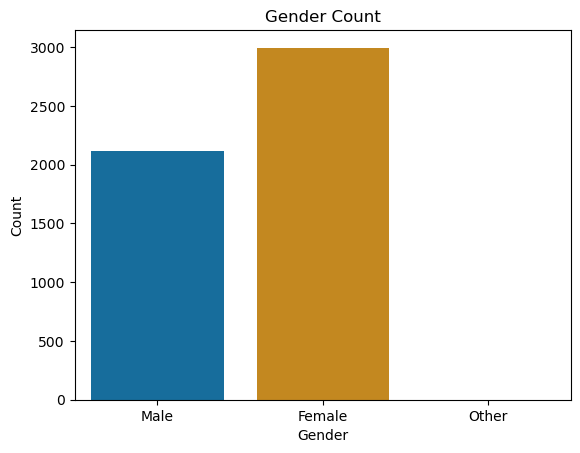

In [51]:
sns.countplot(data=df, x='gender', palette='colorblind')
plt.title('Gender Count')
plt.xlabel('Gender')
plt.ylabel('Count')
#plt.legend(title='Stroke Status', labels=['No Stroke', 'Stroke'])
plt.xticks(rotation=0)
plt.show()

> This dataset has more females than males. We cannot say whether females are more likely to have a stroke compared to males. We do not know if gender impacts stroke risks.

In [52]:
df[df['gender']=='Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


## 2. Age box plot

Older individuals are more likely to experience a stroke

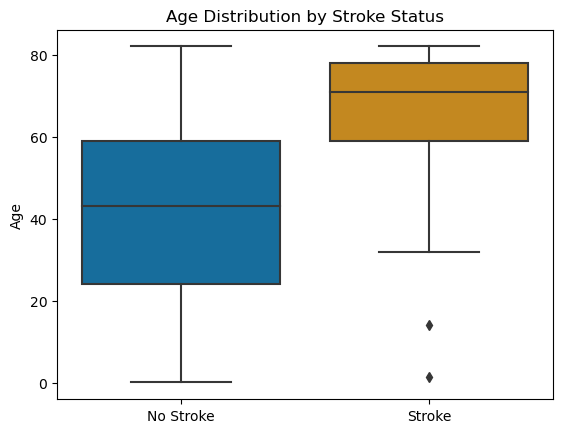

In [53]:
sns.boxplot(data=df, x='stroke', y='age', palette='colorblind')
plt.title('Age Distribution by Stroke Status')
plt.xlabel('')
plt.ylabel('Age')
plt.xticks([0, 1], ['No Stroke', 'Stroke'])
plt.show()

## 3. Hypertension count plot

There are more cases of people without hypertension in the dataset

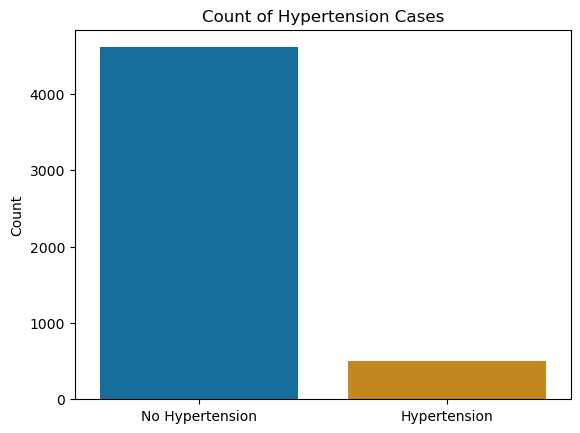

In [54]:
sns.countplot(x='hypertension', data=df, palette='colorblind')
plt.title('Count of Hypertension Cases')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Hypertension', 'Hypertension'])
plt.show()

In [55]:
df['hypertension'].value_counts()

hypertension
0    4612
1     498
Name: count, dtype: int64

In [56]:
#sns.countplot(x='hypertension', hue='stroke', data=df, palette='colorblind')
#plt.title('Count of Hypertension Cases by Stroke Status')
#plt.xlabel('Hypertension')
#plt.ylabel('Count')
#plt.xticks([0, 1], ['No Hypertension', 'Hypertension'])
#plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
#plt.show()


## 4. Heart disease count plot

There are more cases of people without heart disease in the dataset

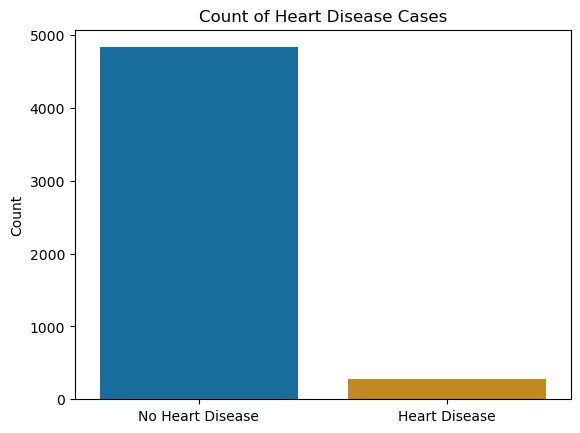

In [57]:
sns.countplot(x='heart_disease', data=df, palette='colorblind')
plt.title('Count of Heart Disease Cases')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.show()

In [58]:
df['heart_disease'].value_counts()

heart_disease
0    4834
1     276
Name: count, dtype: int64

## 5. Marriage status count plot

More individuals are married than those who never married

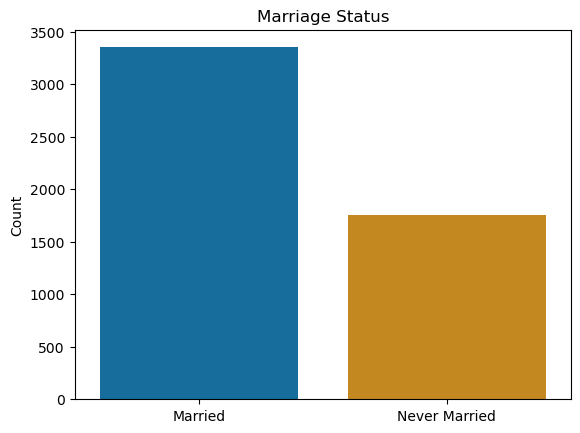

In [59]:
sns.countplot(x='ever_married', data=df, palette='colorblind')
plt.title('Marriage Status')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks([0, 1], ['Married', 'Never Married'])
plt.show()

In [60]:
df['ever_married'].value_counts()

ever_married
Yes    3353
No     1757
Name: count, dtype: int64

## 6. Work type count plot

Most inviduals in this dataset have private jobs

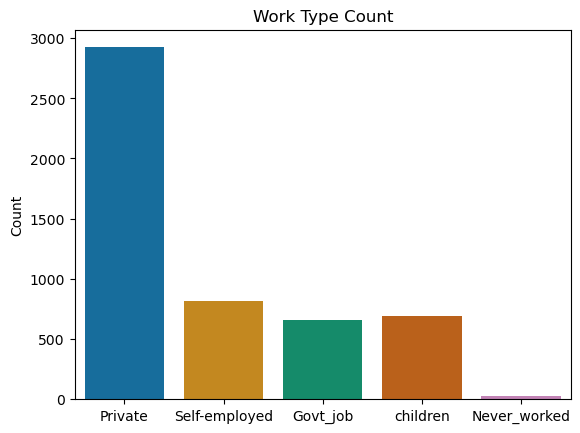

In [61]:
sns.countplot(x='work_type', data=df, palette='colorblind')
plt.title('Work Type Count')
plt.xlabel('')
plt.ylabel('Count')
plt.show()

In [62]:
df['work_type'].value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

## 7. Residence type count plot

People who live in urban and rural are about equal

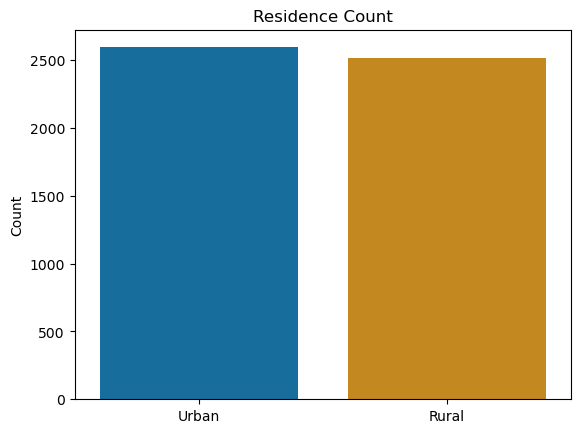

In [63]:
sns.countplot(x='Residence_type', data=df, palette='colorblind')
plt.title('Residence Count')
plt.xlabel('')
plt.ylabel('Count')
plt.show()

In [64]:
df['Residence_type'].value_counts()

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

## 8. Smoking status count plot

1892 people never smoked, 885 people formerly smoked, and 789 people currently smoke. There are 1544 people who have an unknown smoking status.

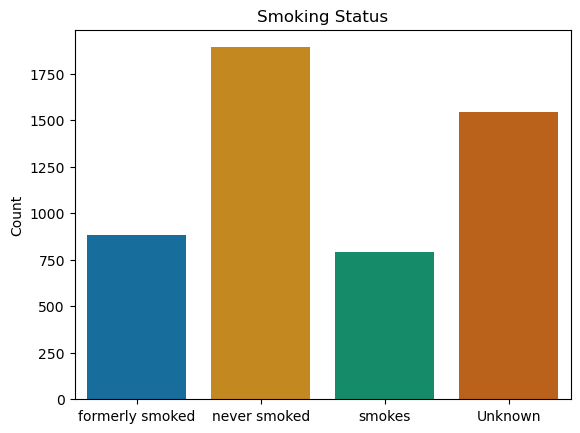

In [65]:
sns.countplot(x='smoking_status', data=df, palette='colorblind')
plt.title('Smoking Status')
plt.xlabel('')
plt.ylabel('Count')
plt.show()

In [66]:
df['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [67]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


## 9. Stroke count plot

95.13% of people had no stroke and 4.87% of people had experienced a stroke

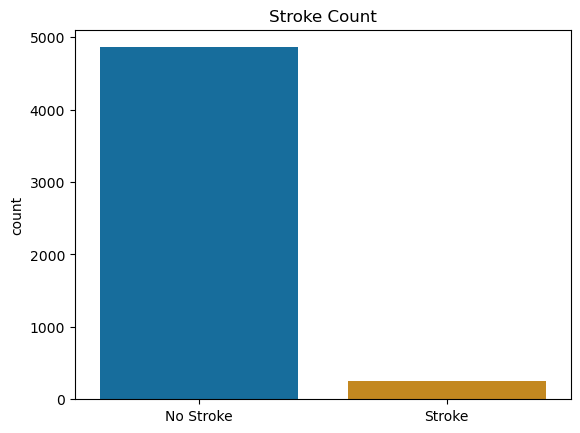

In [68]:
sns.countplot(data=df, x='stroke', palette='colorblind')
plt.title('Stroke Count')
plt.xticks([0,1], ['No Stroke', 'Stroke'])
plt.xlabel('')
plt.show()

In [69]:
stroke_percent = round((df['stroke'].value_counts()/df.shape[0])*100, 2)
stroke_percent

stroke
0    95.13
1     4.87
Name: count, dtype: float64

In [70]:
gluc_by_stroke = round(df.groupby('stroke')['avg_glucose_level'].mean(), 2)
gluc_by_stroke

stroke
0    104.80
1    132.54
Name: avg_glucose_level, dtype: float64

In [71]:
bmi_by_stroke = round(df.groupby('stroke')['bmi'].mean(), 2)
bmi_by_stroke

stroke
0    28.83
1    30.22
Name: bmi, dtype: float64

1. There are 95.13% instances of people having a stroke in this dataset and only 4.87% of the dataset recording those with a stroke. 
2. Of the 95.13% of the people who had no stroke, the  average glucose level was 104.80 and a BMI of 28.83
3. Of the 4.87% of the people who had a stroke, the average glucose level was 132.54 and a BMI of 30.22

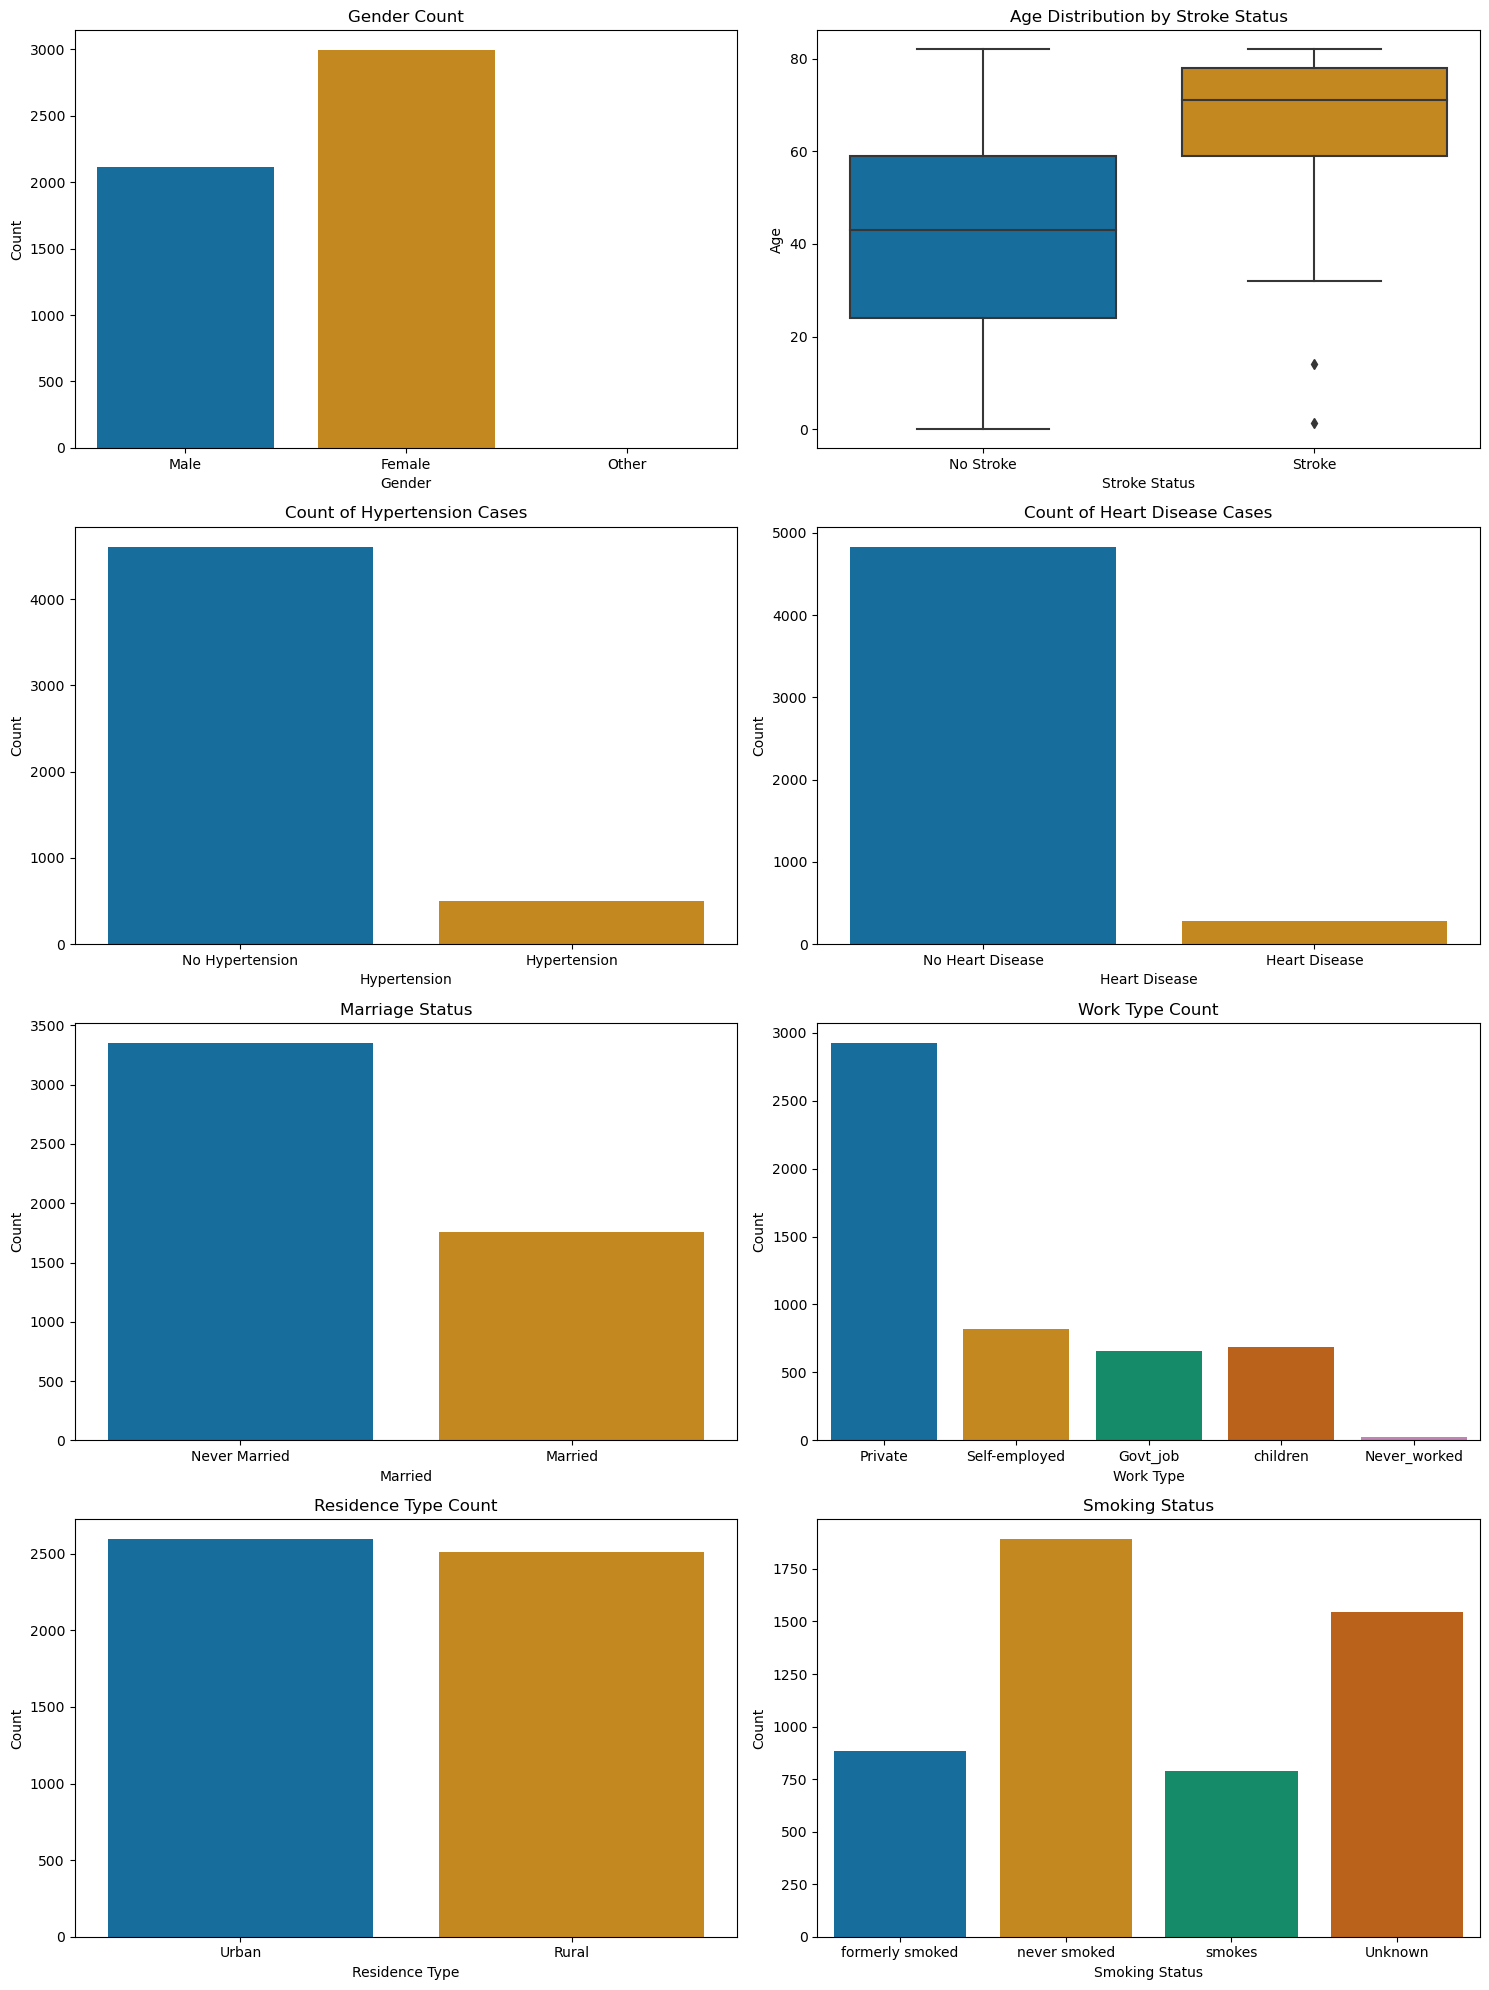

In [72]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(4, 2, figsize=(15, 20))  # 4 rows, 2 columns

# Gender count plot
sns.countplot(data=df, x='gender', palette='colorblind', ax=axes[0, 0])
axes[0, 0].set_title('Gender Count')
axes[0, 0].set_xlabel('Gender')
axes[0, 0].set_ylabel('Count')

# Age distribution by stroke status (box plot)
sns.boxplot(data=df, x='stroke', y='age', palette='colorblind', ax=axes[0, 1])
axes[0, 1].set_title('Age Distribution by Stroke Status')
axes[0, 1].set_xlabel('Stroke Status')
axes[0, 1].set_ylabel('Age')
axes[0, 1].set_xticklabels(['No Stroke', 'Stroke'])

# Hypertension count plot
sns.countplot(x='hypertension', data=df, palette='colorblind', ax=axes[1, 0])
axes[1, 0].set_title('Count of Hypertension Cases')
axes[1, 0].set_xlabel('Hypertension')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_xticklabels(['No Hypertension', 'Hypertension'])

# Heart disease count plot
sns.countplot(x='heart_disease', data=df, palette='colorblind', ax=axes[1, 1])
axes[1, 1].set_title('Count of Heart Disease Cases')
axes[1, 1].set_xlabel('Heart Disease')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_xticklabels(['No Heart Disease', 'Heart Disease'])

# Marriage status count plot
sns.countplot(x='ever_married', data=df, palette='colorblind', ax=axes[2, 0])
axes[2, 0].set_title('Marriage Status')
axes[2, 0].set_xlabel('Married')
axes[2, 0].set_ylabel('Count')
axes[2, 0].set_xticklabels(['Never Married', 'Married'])

# Work type count plot
sns.countplot(x='work_type', data=df, palette='colorblind', ax=axes[2, 1])
axes[2, 1].set_title('Work Type Count')
axes[2, 1].set_xlabel('Work Type')
axes[2, 1].set_ylabel('Count')

# Residence type count plot
sns.countplot(x='Residence_type', data=df, palette='colorblind', ax=axes[3, 0])
axes[3, 0].set_title('Residence Type Count')
axes[3, 0].set_xlabel('Residence Type')
axes[3, 0].set_ylabel('Count')

# Smoking status count plot
sns.countplot(x='smoking_status', data=df, palette='colorblind', ax=axes[3, 1])
axes[3, 1].set_title('Smoking Status')
axes[3, 1].set_xlabel('Smoking Status')
axes[3, 1].set_ylabel('Count')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [74]:
# one-hot encode categorical variables
categorical = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
df1 = pd.get_dummies(df, columns=categorical)

In [75]:
# define features and target
X = df1.drop('stroke', axis=1)
y = df1['stroke']

In [76]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
# standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [78]:
# train the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [79]:
# evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Accuracy Score:", accuracy)

Mean Squared Error: 0.060665362035225046
R-squared: -0.06458333333333366
Accuracy Score: 0.9393346379647749


In [81]:
from sklearn.metrics import confusion_matrix, classification_report

In [82]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[960,   0],
       [ 62,   0]])

In [83]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



/Users/vivianchung/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/vivianchung/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/vivianchung/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

### Class imbalance issue
The model has a significant issue with predicting class 1. This might be due to an imbalance in the dataset, where class 1 is underrepresented compared to class 0.

### Precision and recall trade-off
The high recall for class 0 suggests that the model is very good at identifying non-stroke cases. However, it completely fails to identify stroke cases, leading to zero precision, recall, and F1-score for class 1.

### Overall accuracy
While the overall accuracy is high, it masks the poor performance on class 1. In imbalanced datasets, accuracy alone can be misleading.

### Actions to consider
Resampling Techniques: Use oversampling (e.g., SMOTE) for the minority class or undersampling for the majority class.

In [84]:
# Check class distribution
class_counts = df['stroke'].value_counts()
class_counts

stroke
0    4861
1     249
Name: count, dtype: int64

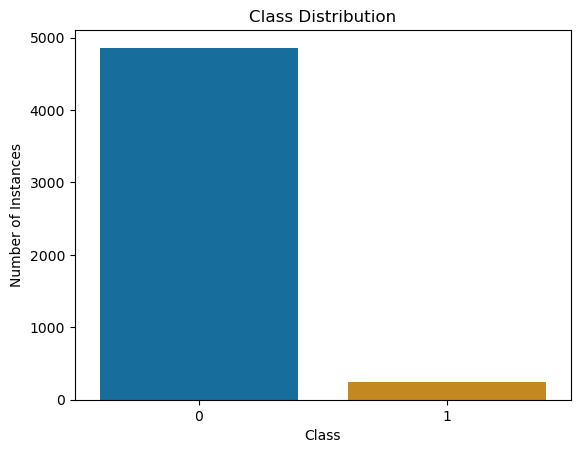

In [85]:
sns.countplot(x='stroke', data=df, palette='colorblind')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.show()

In [86]:
stroke_percent = round((df['stroke'].value_counts()/df.shape[0])*100, 2)
stroke_percent

stroke
0    95.13
1     4.87
Name: count, dtype: float64

This distribution indicates a significant class imbalance
* Class 0 (no stroke): majority class representing about 95% of the dataset
* Class 1 (stroke): minority class representing about 5% of the dataset 

In [87]:
# one-hot encode categorical variables
# define features and target
# split the data
# initialize SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
# fit and resample the training data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
# standardize the data
X_resampled = scaler.fit_transform(X_resampled)
X_test = scaler.transform(X_test)
# train the model
model = LogisticRegression(random_state=42)
model.fit(X_resampled, y_resampled)
# evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.75      0.85       960
           1       0.17      0.77      0.28        62

    accuracy                           0.75      1022
   macro avg       0.57      0.76      0.56      1022
weighted avg       0.93      0.75      0.82      1022



In [88]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[722, 238],
       [ 14,  48]])

### Class 0 (no stroke)
Precision: 98% instances were predicted were correct

Recall: 75% instances were correctly predicted

### Class 1 (stroke)
Precision: 17% instances predicted were correct

Recall: 77% instances were correctly prediction

### Accuracy
75% instances were correctly classified  

### Application of SMOTE
SMOTE has improved the overall model in terms of recall for minority Class 1 (stroke) 


# Random Forest

In [91]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')  # class_weight='balanced' handles class imbalance

# Train the model
rf_model.fit(X_resampled, y_resampled)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [94]:
# Make predictions
y_pred = rf_model.predict(X_test)

In [95]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.91
Confusion Matrix:
[[928  32]
 [ 56   6]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       960
           1       0.16      0.10      0.12        62

    accuracy                           0.91      1022
   macro avg       0.55      0.53      0.54      1022
weighted avg       0.90      0.91      0.90      1022



### High Accuracy but Poor Minority Class Performance

The model shows high overall accuracy (91%), but this is largely driven by its performance on the majority class (Class 0). The poor performance on the minority class (Class 1) is a sign of class imbalance affecting the model. 

# XGBoost

In [97]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/c4/41/f0980f72531ab8e1fdbeb2643c32f6bcc7e8777fa49e362f94d728887a58/xgboost-2.1.1-py3-none-macosx_10_15_x86_64.macosx_11_0_x86_64.macosx_12_0_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 3.7 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [98]:
import xgboost as xgb

In [99]:
# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',  # Binary classification
    eval_metric='logloss',  # Evaluation metric
    use_label_encoder=False,  # Suppress warning
    random_state=42
)

In [100]:
# Train the model
xgb_model.fit(X_resampled, y_resampled) # Use X_train, y_train if not using SMOTE

/Users/vivianchung/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [10:38:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [101]:
# Make predictions
y_pred = xgb_model.predict(X_test)

In [102]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.90
Confusion Matrix:
[[918  42]
 [ 57   5]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       960
           1       0.11      0.08      0.09        62

    accuracy                           0.90      1022
   macro avg       0.52      0.52      0.52      1022
weighted avg       0.89      0.90      0.90      1022



### High Accuracy but Poor Minority Class Performance:

Similar to the previous model with Random Forest, the high accuracy is driven by the majority class (Class 0). The model performs poorly on the minority class (Class 1).

### Imbalanced Performance:

The model is significantly underperforming for the minority class, as seen from the low precision, recall, and F1-score for Class 1. This suggests that the model is not effectively learning to identify the minority class.

## Summary

Logistic Regression: Despite its simplicity, it achieves a decent balance between precision and recall for Class 1, but still struggles with poor F1-score for the minority class.

Random Forest: Offers higher accuracy and better performance metrics for the majority class, but still struggles with the minority class.

XGBoost: Similar to Random Forest, with high accuracy and strong performance on the majority class but poor performance on the minority class.